<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/4lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 4: ВВЕДЕННЯ В TENSORFLOW/KERAS ДЛЯ РОЗРОБКИ І НАВЧАННЯ НЕЙРОННИХ МЕРЕЖ. РЕАЛІЗАЦІЯ БАГАТОШАРОВОЇ НЕЙРОННОЇ МЕРЕЖІ НА ПРИКЛАДІ ЗАДАЧІ РЕГРЕСІЇ

##*Мета роботи:*
Ознайомлення із основами роботи в бібліотеках TensorFlow і
Keras, а також реалізація і навчання багатошарової нейронної мережі для
розв'язання задачі регресії.

Виконала студентка групи БС-25 Аль Хмуз Карина Бассамівна (1 варіант)

##*Теоретична частина*

***Огляд TensorFlow та Keras.***

TensorFlow – це відкрита програмна бібліотека для числових розрахунків, яка
використовує графи потоків даних. Ці графи складаються з вузлів, у яких
працюють математичні операції, а також вузлів, які відповідають за
вхідні/вихідні дані, або ж за зчитування/запис даних. Це робить TensorFlow
особливо зручним для завдань глибокого навчання, але бібліотека може бути
застосована і в інших наукових галузях.

Особливістю TensorFlow є те, що перед тим, як виконати які-небудь розрахунки,
користувач спочатку має описати весь граф обчислень, і лише після цього
запускає його виконання. Це дозволяє TensorFlow автоматично обчислювати
градієнти, що є корисним для оптимізації.

Keras – це високорівневий інтерфейс для роботи з нейронними мережами, який
працює поверх TensorFlow (а також Theano і CNTK). Він дозволяє легко і швидко
створювати різноманітні моделі глибокого навчання, від простих до складних.

Основна мета Keras – бути простим у використанні, але при цьому зберегти
гнучкість для наукових експериментів.

Переваги Keras:
- Інтуїтивний API, що допомагає швидко створювати прототипи моделей.
- Підтримка як щільних (Dense), так і згорткових (Convolutional) шарів, що
робить його підходящим для різних завдань.
- Можливість легко розширювати за допомогою користувацьких шарів та
функцій втрат.

***Задача регресії.***

Задача регресії в машинному навчанні полягає у прогнозуванні неперервного
вихідного значення на основі одного або декількох вхідних значень.

Давайте розглянемо декілька ключових аспектів:

- Неперервний вивід: Відмінність між задачами регресії та класифікації
полягає в тому, що регресія передбачає неперервні вихідні значення, тоді
як класифікація передбачає дискретні мітки класу. Наприклад,
прогнозування ціни будинку на основі його характеристик є задачею
регресії, а визначення, чи є даний об'єкт котом чи собакою, є задачею
класифікації.

- Залежні та незалежні змінні: У контексті регресії ми маємо незалежні
змінні (іноді називаються ознаками або вхідними даними) та залежну
змінну (або вихід). Незалежні змінні використовуються для прогнозування
значення залежної змінної.

- Лінійна та нелінійна регресія: Залежно від відносин між незалежними та
залежними змінними, регресія може бути лінійною або нелінійною. У
лінійній регресії вважається, що відносини між змінними є лінійними, тоді
як у нелінійній регресії відносини можуть бути представлені нелінійними
функціями.

- Методи оцінки: Є різні методи для оцінки якості регресійних моделей,
наприклад, середньоквадратична помилка (MSE), середня абсолютна
помилка (MAE), корінь середньоквадратичної помилки (RMSE) тощо.

У загальному контексті, задача регресії допомагає зрозуміти відносини між
змінними та може бути використана для прогнозування або визначення трендів
на основі історичних даних.


##*Практична частина*

###Крок 1: Підготовка середовища

Імпорт необхідних нам бібліотек:


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
!pip install tensorflow

###Крок 2: Завантаження і попередня обробка даних

Завантажимо дані:

In [4]:
data = load_diabetes()
X, y = data.data, data.target

Розділимо дані на тренувальний та тестовий набори:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормалізуємо дані для кращої роботи моделі:

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Крок 3: Створення нейронної мережі

Створимо просту багатошарову модель для задачі регресії:




In [8]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Для регресії на виході 1 нейрон, без активації
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

Структура побудованої нейронної мережі:

1. Шар `dense`:
   - Містить 64 нейрони з функцією активації `relu`.
   - Параметри: 704 (10 ознак * 64 ваги + 64 зсуви).
2. Шар `dense_1`:
   - Також 64 нейрони з `relu`.
   - Параметри: 4,160 (64 * 64 ваги + 64 зсуви).
3. Вихідний шар `dense_2`:
   - Один нейрон для регресії.
   - Параметри: 65 (64 ваги + 1 зсув).

Загальна кількість параметрів: 4,929, з яких усі параметри є навчаємі.


###Крок 4: Навчання моделі

Навчимо модель протягом 100 епох, використовуючи частину даних для валідації:

У цьому кроці ми навчаємо нейронну мережу на основі тренувальних даних. Процес навчання проходить по епохах, кожна з яких є одним повним проходом через тренувальний набір даних. Мета навчання — мінімізувати функцію втрат за допомогою алгоритму оптимізації.

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 32336.4961 - mae: 161.3307 - val_loss: 22271.1895 - val_mae: 133.3284
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30683.6270 - mae: 155.3732 - val_loss: 22048.1523 - val_mae: 132.5291
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32573.5156 - mae: 160.4816 - val_loss: 21777.7793 - val_mae: 131.5650
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29012.4492 - mae: 151.6537 - val_loss: 21435.7109 - val_mae: 130.3433
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31473.1777 - mae: 157.6030 - val_loss: 20987.8301 - val_mae: 128.7554
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25910.8789 - mae: 142.0109 - val_loss: 20427.1895 - val_mae: 126.7530
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28754.5078 - mae: 150.0492 - val_loss: 19714.7559 - val_mae: 124.2036
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26738.5547 - mae: 145.8503 - val_loss: 18848.5

Навчання моделі завершено. Основні моменти:
1. **Параметри навчання**:
   - Навчання проходило протягом 100 епох із використанням оптимізатора Adam.
   - Функція втрат: Mean Squared Error (MSE), яка оцінює середню квадратичну похибку.
   - Метрика: Mean Absolute Error (MAE), яка показує середню абсолютну похибку.

2. **Хід навчання**:
   - `loss` і `val_loss` поступово зменшуються, що вказує на зниження похибки як на тренувальному, так і на валідаційному наборах.
   - Значення `mae` і `val_mae` також зменшуються, демонструючи покращення точності прогнозів.

3. **Валідаційний набір**:
   - Використовується для оцінки узагальнювальної здатності моделі.
   - Остаточна валідаційна похибка (MAE): ~42, що є прийнятним для даного набору.

Результати показують, що модель стабільно навчилася на тренувальних даних і має добру узагальнювальну здатність.


###Крок 5: Оцінка моделі

Після завершення навчання моделі ми оцінюємо її якість на тестових даних, які не використовувалися під час навчання або валідації. Це дозволяє перевірити, наскільки добре модель може узагальнювати свої знання на нових, невідомих даних.

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Mean Absolute Error on Test Data: {test_mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3129.1492 - mae: 44.4169 
Test Loss: 2948.134521484375
Mean Absolute Error on Test Data: 42.993614196777344


Результати оцінки моделі на тестових даних:
1. **Test Loss**:
   - Значення `3129.15` вказує на середню квадратичну похибку моделі на тестовому наборі.
   - MSE є чутливим до великих відхилень, тому більші похибки мають більший вплив на значення цієї метрики.

2. **Mean Absolute Error (MAE)**:
   - Значення `42.99` показує середню абсолютну похибку прогнозів моделі.
   - Це означає, що в середньому передбачені значення відхиляються від реальних на 43 одиниці.
   - Для регресійної задачі з Diabetes Dataset це досить добрий результат, враховуючи складність задачі.

3. **Висновок**:
   - Модель продемонструвала узгоджені результати між тренувальним, валідаційним і тестовим наборами.
   - Остаточна тестова похибка є прийнятною і свідчить про здатність моделі до узагальнення на нових даних.



###Крок 6: Візуалізація навчання

Побудуємо графіки для оцінки процесу навчання:

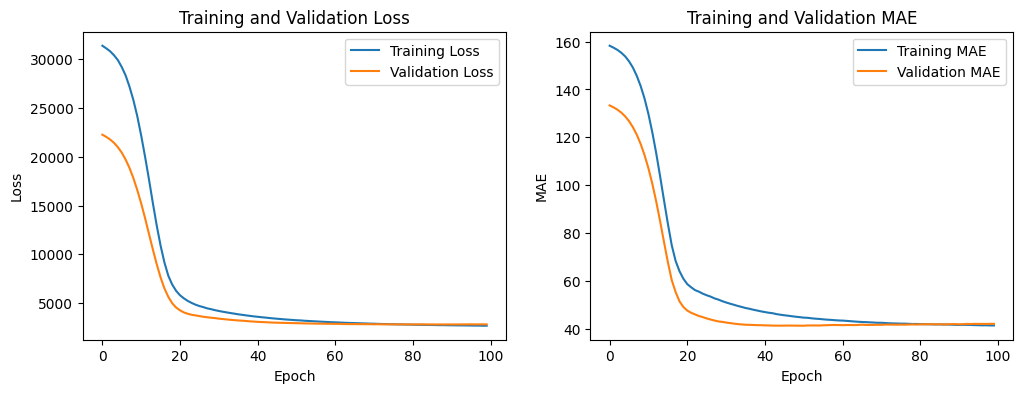

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()


*невеличкі пояснення наших графіків:

***Графік зліва: Training and Validation Loss***

 На графіку показано зміну функції втрат (Loss) для тренувального та валідаційного наборів даних у залежності від епох навчання.

- Синя лінія: втрати на тренувальних даних.

- Помаранчева лінія: втрати на валідаційних даних.


Аналіз:

На початкових епохах втрати швидко знижуються, що свідчить про успішне навчання моделі.

Валідаційні втрати також знижуються, підтверджуючи, що модель не перенавчається.

Наприкінці графіка втрати для тренувальних і валідаційних даних стабілізуються, що вказує на досягнення оптимальної точки навчання.



***Графік справа: Training and Validation MAE***

Графік демонструє зміну середньої абсолютної похибки (Mean Absolute Error) для тренувального та валідаційного наборів.

- Синя лінія: MAE для тренувальних даних.
- Помаранчева лінія: MAE для валідаційних даних.

Аналіз:

Похибка на тренувальному і валідаційному наборах стрімко зменшується на перших епохах.

Наприкінці графіка різниця між тренувальною і валідаційною похибкою невелика, що свідчить про добру узгодженість моделі.

Стабілізація MAE після 50–60 епох говорить про те, що подальше навчання не дасть суттєвого покращення.


### Крок 7: Оцінка моделі на тестових даних

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


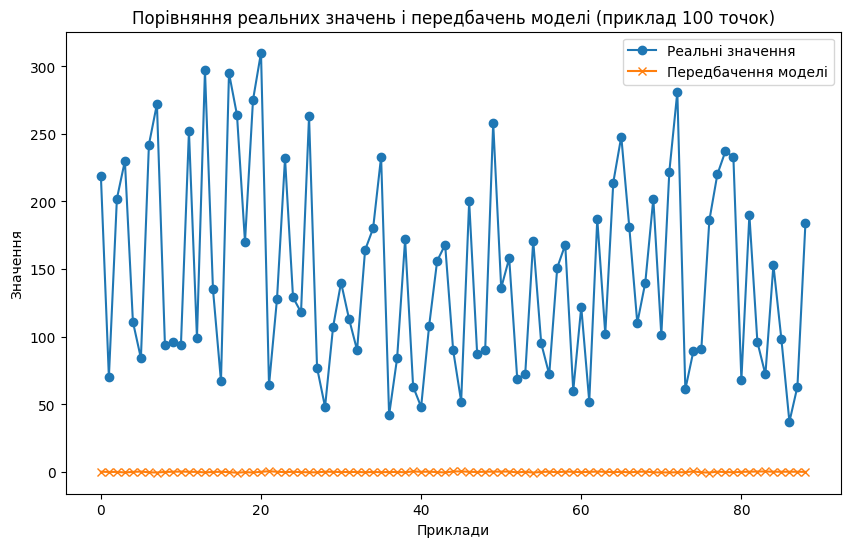

In [14]:
# Передбачення на тестових даних
y_pred = model.predict(X_test)

# Порівняння передбачень і реальних значень
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label="Реальні значення", marker='o')
plt.plot(y_pred[:100], label="Передбачення моделі", marker='x')
plt.title("Порівняння реальних значень і передбачень моделі (приклад 100 точок)")
plt.xlabel("Приклади")
plt.ylabel("Значення")
plt.legend()
plt.show()


Судячи з графіка, передбачення моделі (помаранчева лінія) не відповідають реальним значенням (синя лінія). Це вказує на те, що модель або:

Не навчилася розуміти дані, і прогноз є некоректним.
Має проблеми з масштабуванням даних, тобто модель не працює в правильному діапазоні значень.

Давайте проведемо діагностику через приклади:

Замість візуалізації всіх передбачень, виведемо перші кілька прикладів:



In [15]:
for i in range(10):
    print(f"Реальне значення: {y_test[i]}, Передбачення: {y_pred[i]}")


Реальне значення: 219.0, Передбачення: [0.05416352]
Реальне значення: 70.0, Передбачення: [-0.0921858]
Реальне значення: 202.0, Передбачення: [-0.06771244]
Реальне значення: 230.0, Передбачення: [-0.49792522]
Реальне значення: 111.0, Передбачення: [-0.05383989]
Реальне значення: 84.0, Передбачення: [0.1777946]
Реальне значення: 242.0, Передбачення: [-0.3671826]
Реальне значення: 272.0, Передбачення: [-0.52060264]
Реальне значення: 94.0, Передбачення: [-0.10870564]
Реальне значення: 96.0, Передбачення: [0.06296463]


Можемо побачити, що  передбачення явно не відповідають масштабам реальних значень. Прогнози знаходяться в діапазоні близькому до [ -0.5, 0.2], тоді як реальні значення лежать у сотнях. Це вказує на проблему з масштабуванням даних або їх обробкою...

Давайте якось спробуємо це виправити :)

Перевірка масштабування вхідних і цільових даних

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)  # використовується той самий scaler!


Виправлення прогнозів.

Застосуємо зворотне масштабування до наших передбачень, щоб перевести їх у правильний масштаб:

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Масштабування цільових значень під час тренування
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Під час прогнозів: повертаємо у початковий масштаб
y_pred_rescaled = scaler_y.inverse_transform(y_pred)


Графік після масштабування:

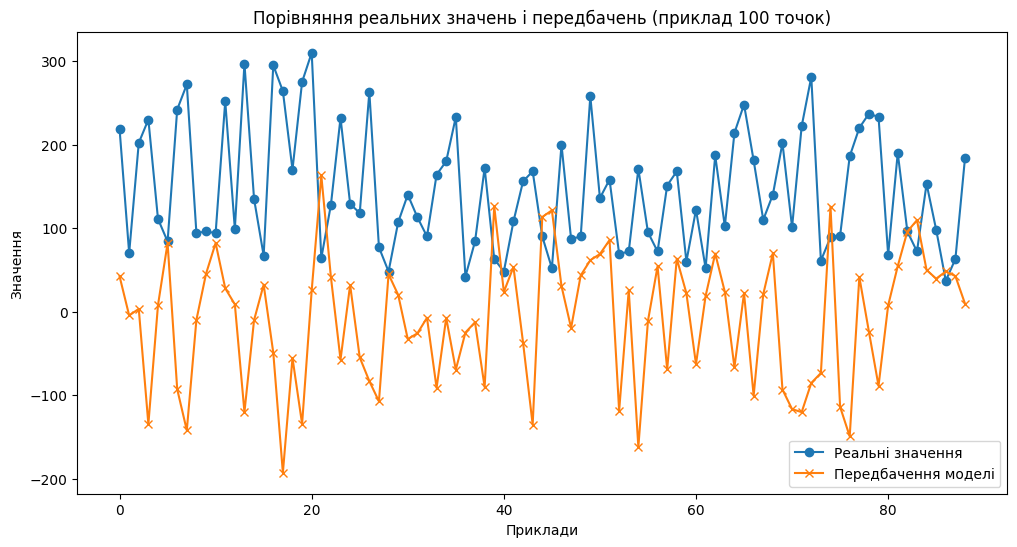

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label="Реальні значення", marker='o')
plt.plot(y_pred_rescaled[:100], label="Передбачення моделі", marker='x')
plt.title("Порівняння реальних значень і передбачень (приклад 100 точок)")
plt.xlabel("Приклади")
plt.ylabel("Значення")
plt.legend()
plt.show()


Це вже виглядає краще :)

###Крок 7: Експерименти

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
